In [1]:
library(dplyr)
library(WCE)
library(purrr)

source("src/data_simulation.r")
source("src/weight_functions.r")
source("../R/R/wceGPU.R")



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [1]:
doses = c(1,1.5,2,2.5,3)
print("toto")
print("???")

Xmat_list <- generate_Xmat_list(365,500,10,doses)
print(Xmat_list[10])

[1] "toto"
[1] "???"


ERROR: Error in generate_Xmat_list(365, 500, 10, doses): could not find function "generate_Xmat_list"


# Script d'analyse

In [1]:
analyze_simulations <- function(list_simulations,correct_shape){

    right_constrained <- do.call(rbind,list_simulations$right_constrained)
    BIC_right_constrained <- mean(unlist(list_simulations$right_constrained_BIC))
    MSE_right_constrained <- mean(unlist(list_simulations$right_constrained_MSE))
    print("Right constrained")
    print(paste("Mean BIC : ",BIC_right_constrained))
    print(paste("Mean MSE : ",MSE_right_constrained))

    unconstrained <- do.call(rbind,list_simulations$unconstrained)
    BIC_unconstrained <- mean(unlist(list_simulations$unconstrained_BIC))
    MSE_unconstrained <- mean(unlist(list_simulations$unconstrained_MSE))
    print("Unconstrained")
    print(paste("Mean BIC : " ,BIC_unconstrained))
    print(paste("Mean MSE : " ,MSE_unconstrained))




    ## get MSE 
    #MSE_list_right_constrained <- c()
    #for (simulation in right_constrained){
    #    MSE_list_right_constrained <- append(MSE_list_right_constrained, )
#
    #}
    #MSE_list_unconstrained <- c()
    #for (list in list_simulations){
#
    #}

    curves <- get_mean_curve(right_constrained)
    matplot(curves$mean, type = "l", col = "black", lty = 1, 
            main ="Mean right constrained", xlab="Time since exposure (days)", ylab ="Weight")
    matlines(curves$higher_sd, type = "l", col = "black", lty = 2)
    matlines(curves$lower_sd, type = "l", col = "black", lty = 2)
    matlines(correct_shape, type = "l", col = "red", lty = 1)
    legend("topright", legend=c("mean simulation","sd","real weight"), col=c("black","black","red"),lty=c(1,2,1))
    

    t(right_constrained) %>% 
        matplot(, type = "l", col = "black", lty = 1, 
                main ="Right constrained", xlab="Time since exposure (days)", ylab ="Weight")

    matlines(correct_shape, type = "l", col = "red", lty = 1)
    legend("topright", legend=c("simulations","real weight"), col=c("black","red"),lty=1)

    curves <- get_mean_curve(unconstrained)
    matplot(curves$mean, type = "l", col = "black", lty = 1, 
            main ="Mean unconstrained", xlab="Time since exposure (days)", ylab ="Weight")
    matlines(curves$higher_sd, type = "l", col = "black", lty = 2)
    matlines(curves$lower_sd, type = "l", col = "black", lty = 2)
    matlines(correct_shape, type = "l", col = "red", lty = 1)
    legend("topright", legend=c("mean simulation","sd","real weight"), col=c("black","black","red"),lty=c(1,2,1))

    t(unconstrained) %>% 
        matplot(, type = "l", col = "black", lty = 1,
                main ="Unconstrained", xlab="Time since exposure (days)", ylab ="Weight")
    matlines(correct_shape, type = "l", col = "red", lty = 1)    
    legend("topright", legend=c("simulations","real weight"), col=c("black","red"),lty=1)


}

In [3]:
get_mean_curve <- function(list_curves){
  mean_curve <- c()
  lower_sd <- c()
  higher_sd <- c()

  for (i in 1:length(list_curves[1,])){
    mean <- mean(list_curves[,i])
    sd <- sd(list_curves[,i])

    
    mean_curve <- append(mean_curve,mean)
    lower_sd <- append(lower_sd, mean-sd)
    higher_sd <- append(higher_sd, mean +sd)
  }

  return(list(mean = mean_curve,
              lower_sd = lower_sd,
              higher_sd = higher_sd))
}

# Analyses

In [13]:
doses = c(1,1.5,2,2.5,3)
print("toto")
print("???")

Xmat_list <- generate_Xmat_list(365,500,10,doses)
Xmat_list

[1] "toto"
[1] "???"
[1] "start test"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


In [17]:
scenario <- exponential_weight
cutoff <- 180
normalization <- normalize_function(scenario = scenario, 1, cutoff/365)

doses = c(1,1.5,2,2.5,3)

Xmat_list <- generate_Xmat_list(365,500,10,doses)

list_simulations <- simulate_with_bootstraps(n_bootstraps = 1,
                                           number_patients = 500,
                                           observation_time = 365,
                                           scenario = scenario,
                                           cutoff = cutoff,
                                           normalization =  normalization,
                                           Xmat = Xmat)

[1] "Right constrained"
[1] "Mean BIC :  3797.95202491179"
[1] "Mean MSE :  5.47215324205452e-06"
[1] "Unconstrained"
[1] "Mean BIC :  3807.45352847458"
[1] "Mean MSE :  1.30540244891473e-05"


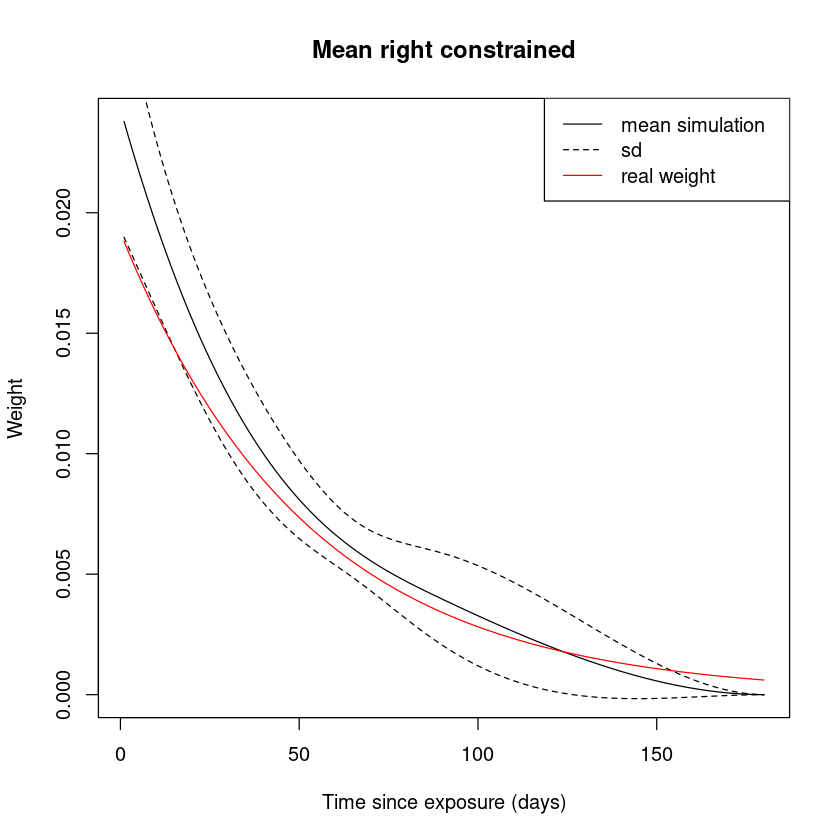

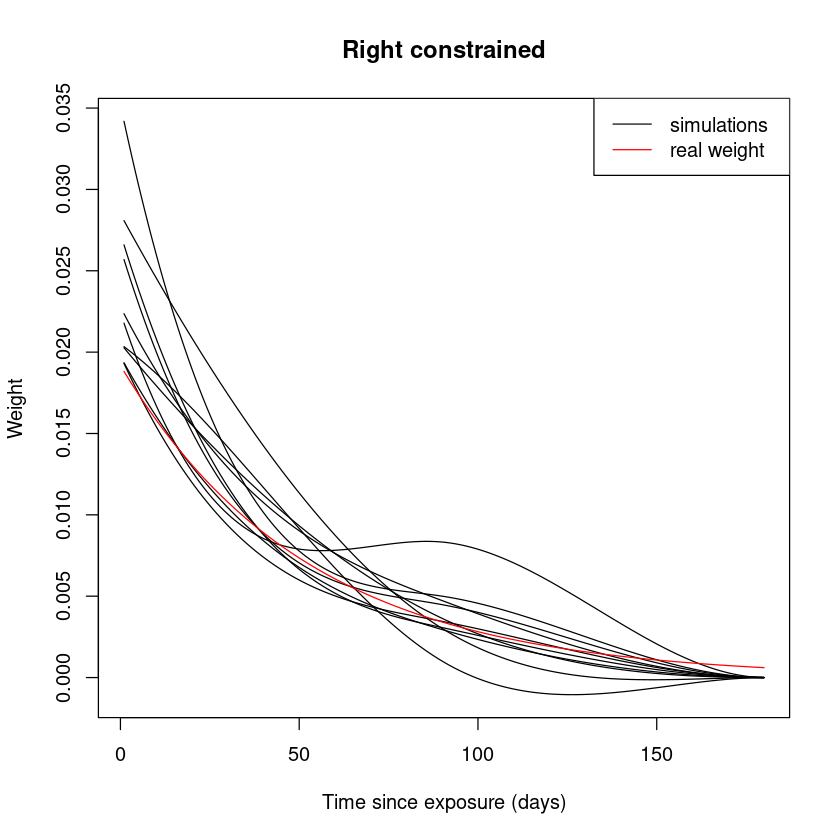

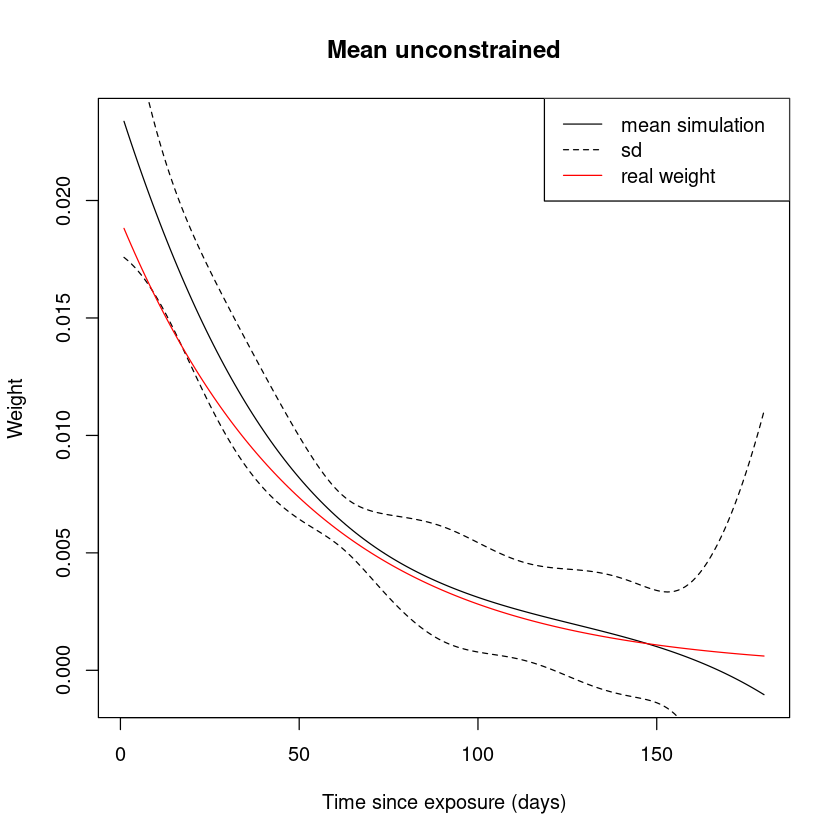

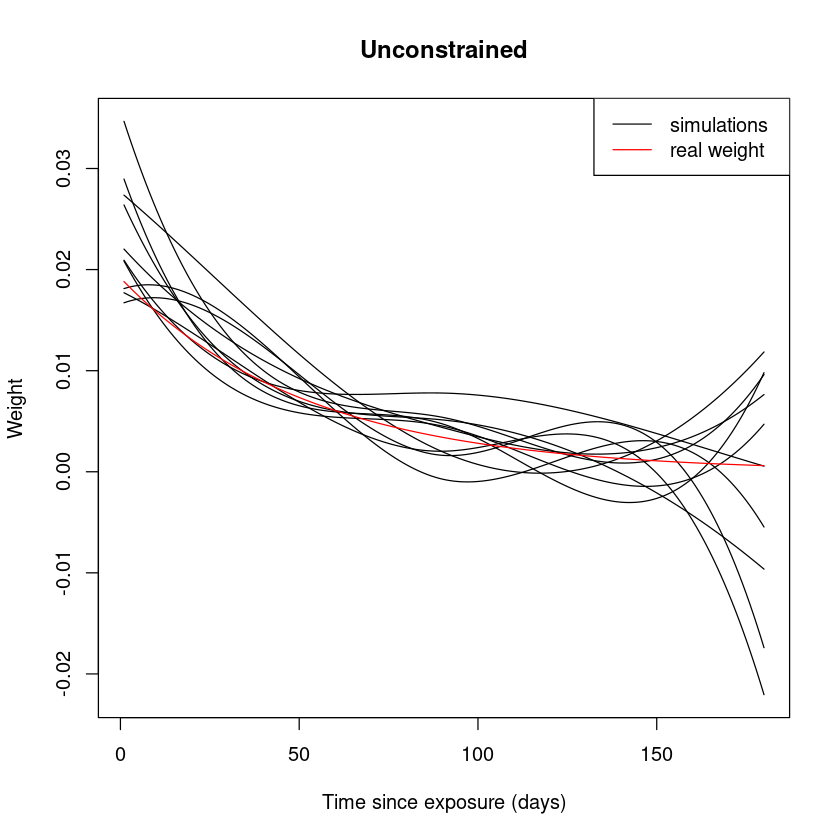

In [63]:
correct_shape <- calcul_exposition(scenario,normalization)
analyze_simulations(list_simulations, correct_shape)

In [64]:
scenario <- early_peak_weight
cutoff <- 180
normalization <- normalize_function(scenario = scenario, 1, cutoff/365)
 

list_simulations <- simulate_with_bootstraps(n_bootstraps =10,
                                           number_patients = 500,
                                           observation_time = 365,
                                           scenario = scenario,
                                           cutoff = cutoff,
                                           normalization =  normalization)

[1] 0.7881446

[1] "################ Start simulation #################"
[1] "simulation of  10 bootstraps"
[1] "Simulation of bootstrap 1"
[1] "Simulation of bootstrap 2"
[1] "Simulation of bootstrap 3"
[1] "Simulation of bootstrap 4"
[1] "Simulation of bootstrap 5"
[1] "Simulation of bootstrap 6"
[1] "Simulation of bootstrap 7"
[1] "Simulation of bootstrap 8"
[1] "Simulation of bootstrap 9"
[1] "Simulation of bootstrap 10"
[1] "This simulation took :  91  seconds"


[1] "Right constrained"
[1] "Mean BIC :  3756.03358682684"
[1] "Mean MSE :  1.77803252612921e-05"
[1] "Unconstrained"
[1] "Mean BIC :  3764.83028684845"
[1] "Mean MSE :  2.66604984046808e-05"


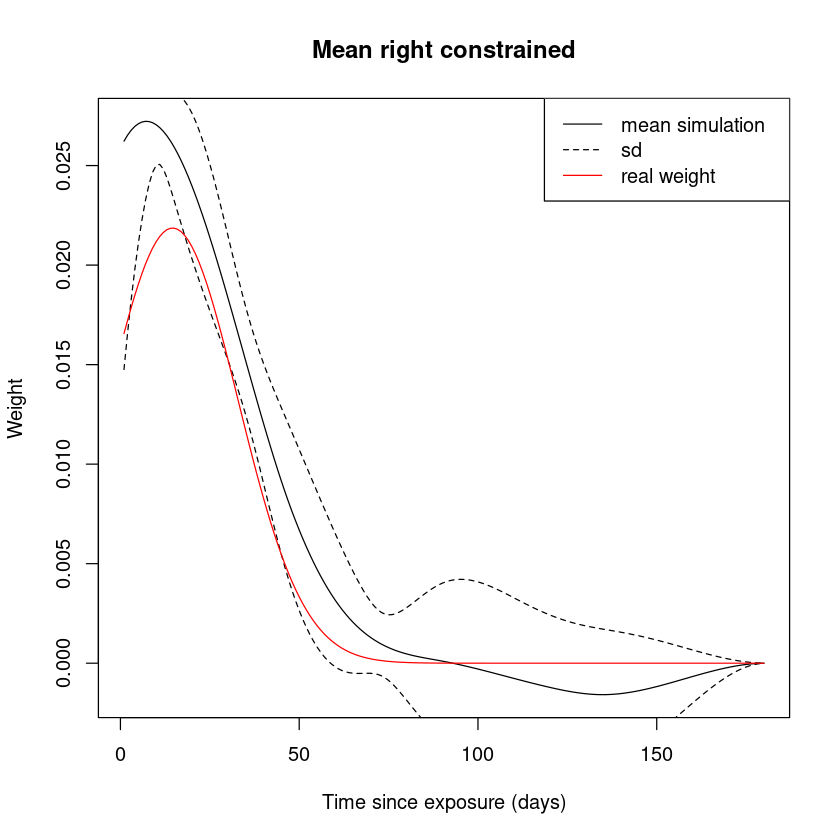

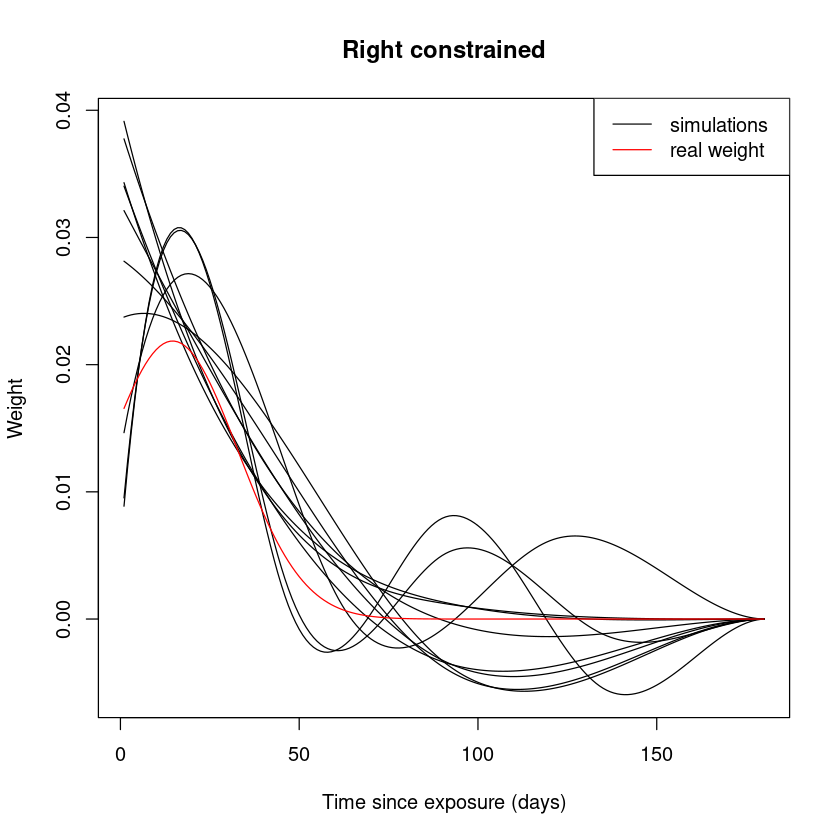

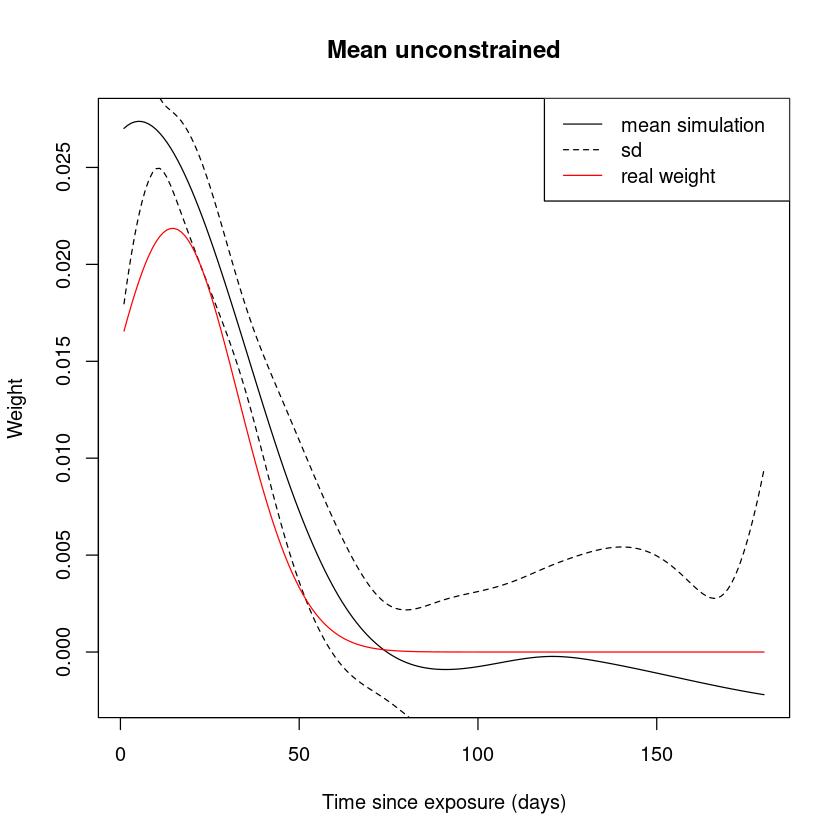

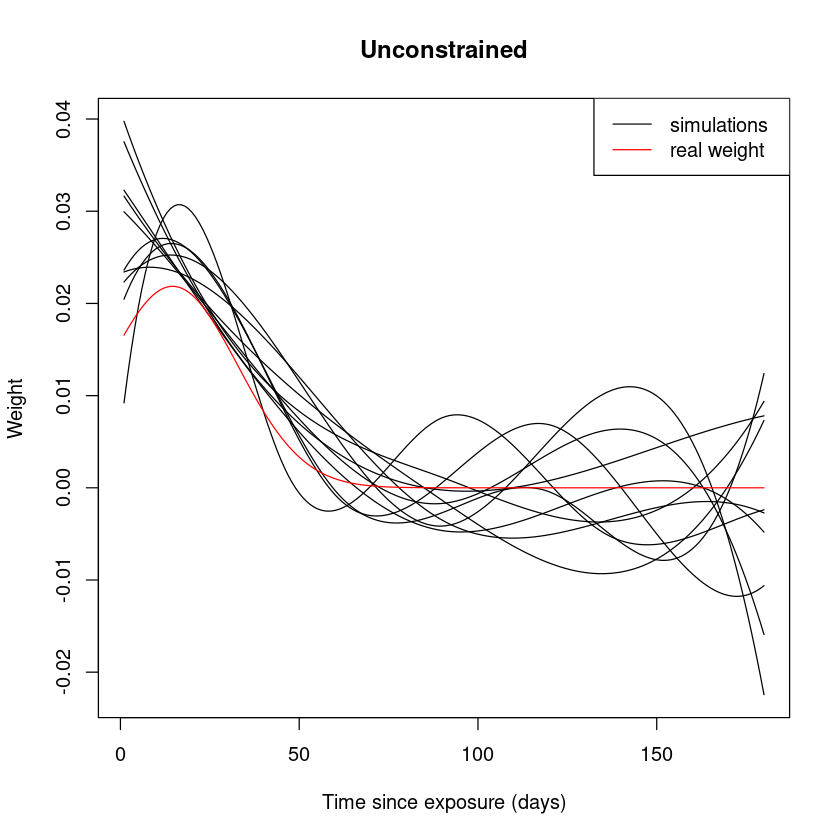

In [65]:
correct_shape <- calcul_exposition(scenario,normalization)
analyze_simulations(list_simulations, correct_shape)

In [23]:
generate_Xmat <- function(observation_time,n_patients){
  Xmat = matrix(ncol = 1,
                nrow = n_patients * observation_time)
  Xmat[, 1] <- do.call("c", lapply(1:n_patients, function(i) TDhist(observation_time)))
  dim(Xmat) <- c(observation_time, n_patients)
  return(Xmat)
  }

In [43]:
setClass("Student_Info", representation(name = "character", age = "numeric", GPA = "numeric"))

setMethod("birthday1", 
"Student_Info",

function(self){
  self@age <- self@age + 1
  print("test")
  return(self)
}
)

student1 <- new("Student_Info", name = "John", age = 21, GPA = 3.5)
student1@age
student1 <- birthday1(student1)
student1@age





ERROR: Error in setMethod("birthday1", "Student_Info", function(self) {: no existing definition for function ‘birthday1’


In [42]:
# Define the Student_Info class
setClass("Student_Info", 
         slots = representation(name = "character", age = "numeric", GPA = "numeric"))

# Define the birthday1 method for Student_Info class
setMethod("birthday1", 
          "Student_Info",
          function(self) {
            self@age <- self@age + 1
            print("Happy Birthday!")
            return(self)
          })

# Create an instance of Student_Info
student1 <- new("Student_Info", name = "John", age = 21, GPA = 3.5)

# Check the age before the birthday
cat("Age before birthday:", student1@age, "\n")

# Apply the birthday1 WCE
student1 <- birthday1(student1)

# Check the age after the birthday
cat("Age after birthday:", student1@age, "\n")


ERROR: Error in setMethod("birthday1", "Student_Info", function(self) {: no existing definition for function ‘birthday1’


In [10]:
birthday <- function(self){
  self$age <- self$age +1
  return(self)
}
a
a <- birthday(a)
a

$name
[1] "Adam"

$Roll_No
[1] 15

attr(,"class")
[1] "student"

$name
[1] "Adam"

$Roll_No
[1] 15

$age
numeric(0)

attr(,"class")
[1] "student"